In this notebook we'll use PyTorch to build a binary classification model to predict gender based on a couple features of the human body.

# Data Preparation

The analysis will be based on the 'Gender Classification Dataset' dataset by Jifry Issadeen available on kaggle.com - https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset.

This dataset was created for educational purposes.

This dataset consists of 5001 records containing information on particular individuals, regarding hair length, forehead dimensions, nose dimensions, lips thickness and nose-to-lip distance. Detailed information on each feature is included below.

Let's import the libraries we need:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

Let's download and view the data:

In [ ]:
path = r'gender_classification_v7.csv'
df = pd.read_csv(path)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


As this is binary classification, there should be just two labels, Male and Female. Let's make sure:

In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2501
Male,2500


There are two, and besides, the dataset is very well-balanced.

## Data Description

Let's look at basic information about the data:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


The DataFrame consists of 5001 rows, each of which represents a single person, and 8 columns, each of which represents a single feature.

The data is complete, there are no missing values. All columns except the last one are numerical (of the integer or float type).

Let's have a closer look at the particular columns:

- long_hair - 1 represents long hair, 0 represents not long hair
- forehead_width_cm - the width of the forehead in cm
- forehead_height_cm - the height of the forehead in cm
- nose_wide - 1 represents wide nose, 0 represents not wide nose
- nose_long - 1 represents long nose, 0 represents not long nose
- lips_thin - 1 represents thin lips, 0 represents not thin lips
- distance_nose_to_lip_long - 1 represents long distance between nose and lips, 0 represents short distance between nose and lips
- gender - Male or Female

The last column, gender, serves as the target variable for prediction.

## Data Preprocessing and Cleaning

### Removing Redundant Rows and Columns

There are no redundant rows or columns.

### Missing Data

There is no missing data:

In [ ]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


### Duplicates

Let's check for duplicates:

In [ ]:
df.duplicated().any()

True

Turns out, there are some duplicates. Let's see how many:

In [ ]:
df.duplicated().value_counts()

,count
False,3233
True,1768


There are quite a few. We have 3233 unique rows and 1768 duplicated ones. Let's remove the duplicates:

In [ ]:
df = df.drop_duplicates()

Let's see if now the dataset is still as balanced as before:

In [ ]:
df['gender'].value_counts()

,count
gender,
Male,1783
Female,1450


Well, it's not as balanced as before, but it still can be considered a pretty well-balanced dataset.

### Data Transformations

We mostly have numerical data. The only column with categorical data is gender, but it can be easily transformed into numerical data:

In [ ]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df.head()

<ipython-input-11-723e3da94ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


## A Statistical Summary of the Numeric Features

Let's have a look at a statistical summary of the numeric features for the entire dataset:

In [ ]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314,0.551500
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019,0.497418
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.000000


At first glance, the data looks reasonable. But let's check it out.

## Outliers

Let's check if there are any outliers:

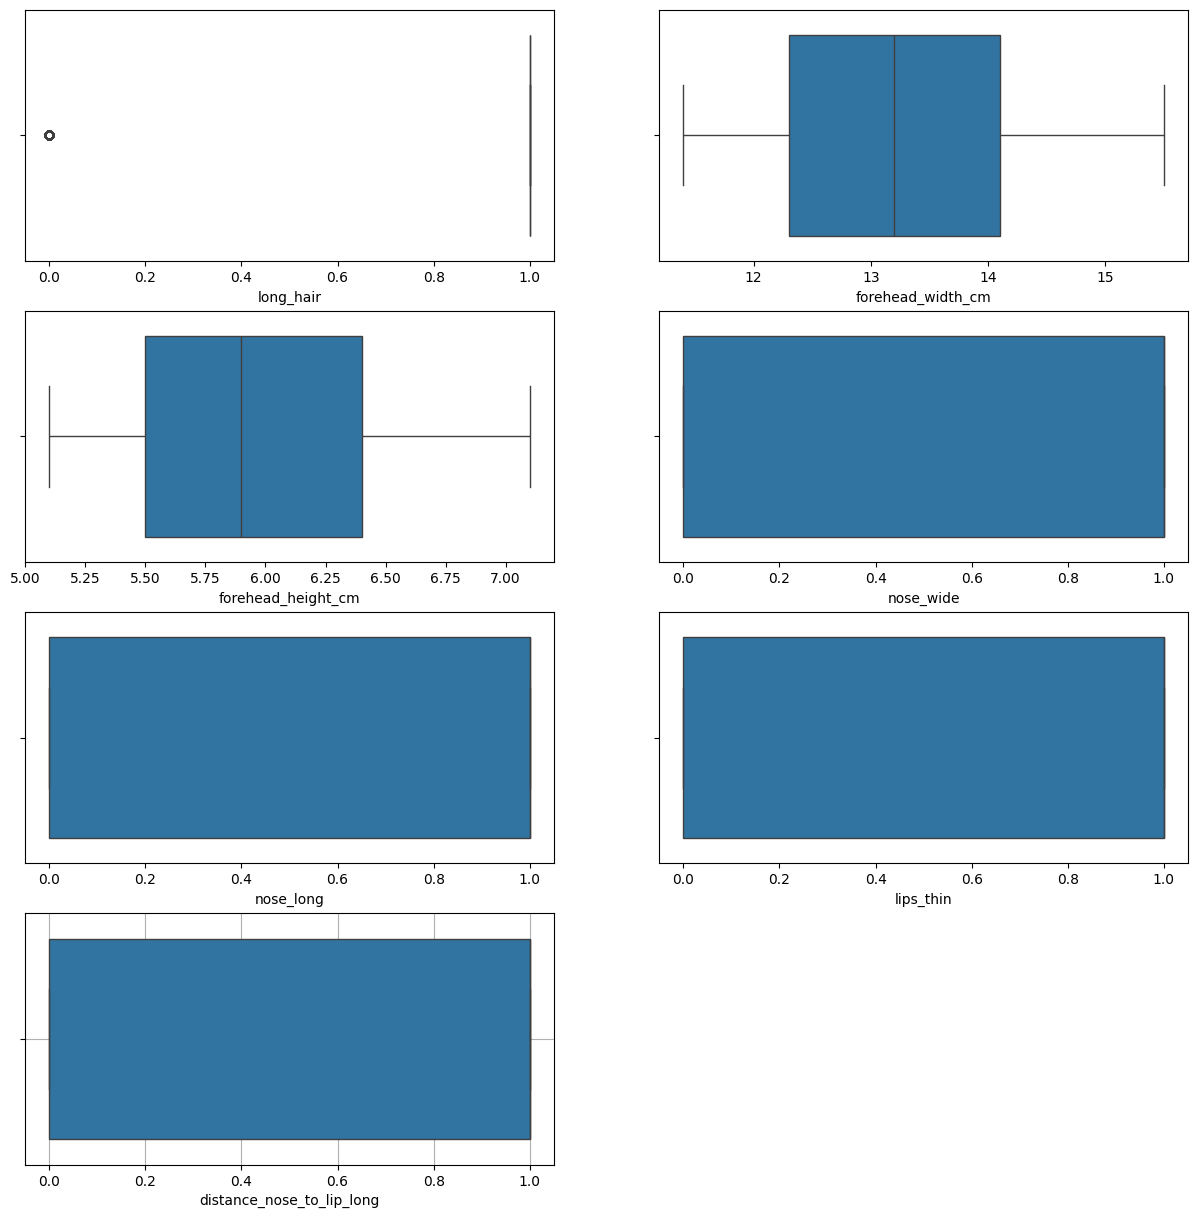

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(4, 2, 1)
sns.boxplot(data=df, x=df["long_hair"], orient="h")
plt.subplot(4, 2, 2)
sns.boxplot(data=df, x=df["forehead_width_cm"], orient="h")
plt.subplot(4, 2, 3)
sns.boxplot(data=df, x=df["forehead_height_cm"], orient="h")
plt.subplot(4, 2, 4)
sns.boxplot(data=df, x=df["nose_wide"], orient="h")
plt.subplot(4, 2, 5)
sns.boxplot(data=df, x=df["nose_long"], orient="h")
plt.subplot(4, 2, 6)
sns.boxplot(data=df, x=df["lips_thin"], orient="h")
plt.subplot(4, 2, 7)
sns.boxplot(data=df, x=df["distance_nose_to_lip_long"], orient="h")
plt.grid()

It looks like there are some outliers for the long_hair feature, but we can also see in the table above that the min value for this feature is 0 and the max value is 1, so actually, there are no outliers. This feature is probably distributed unevenly:

In [ ]:
df["long_hair"].value_counts()

,count
long_hair,
1,2659
0,574


That's right. There are way more people with long hair in the dataset.

## Data Visualization

Let's visualize the data to get a deeper insight.

### Correlations Between Features

Let's have a look at the relationships between the particular features. In particular, we're interested in how the features correlate with the target feature, which is gender.

Let's plot the pairwise relationships between the features first:

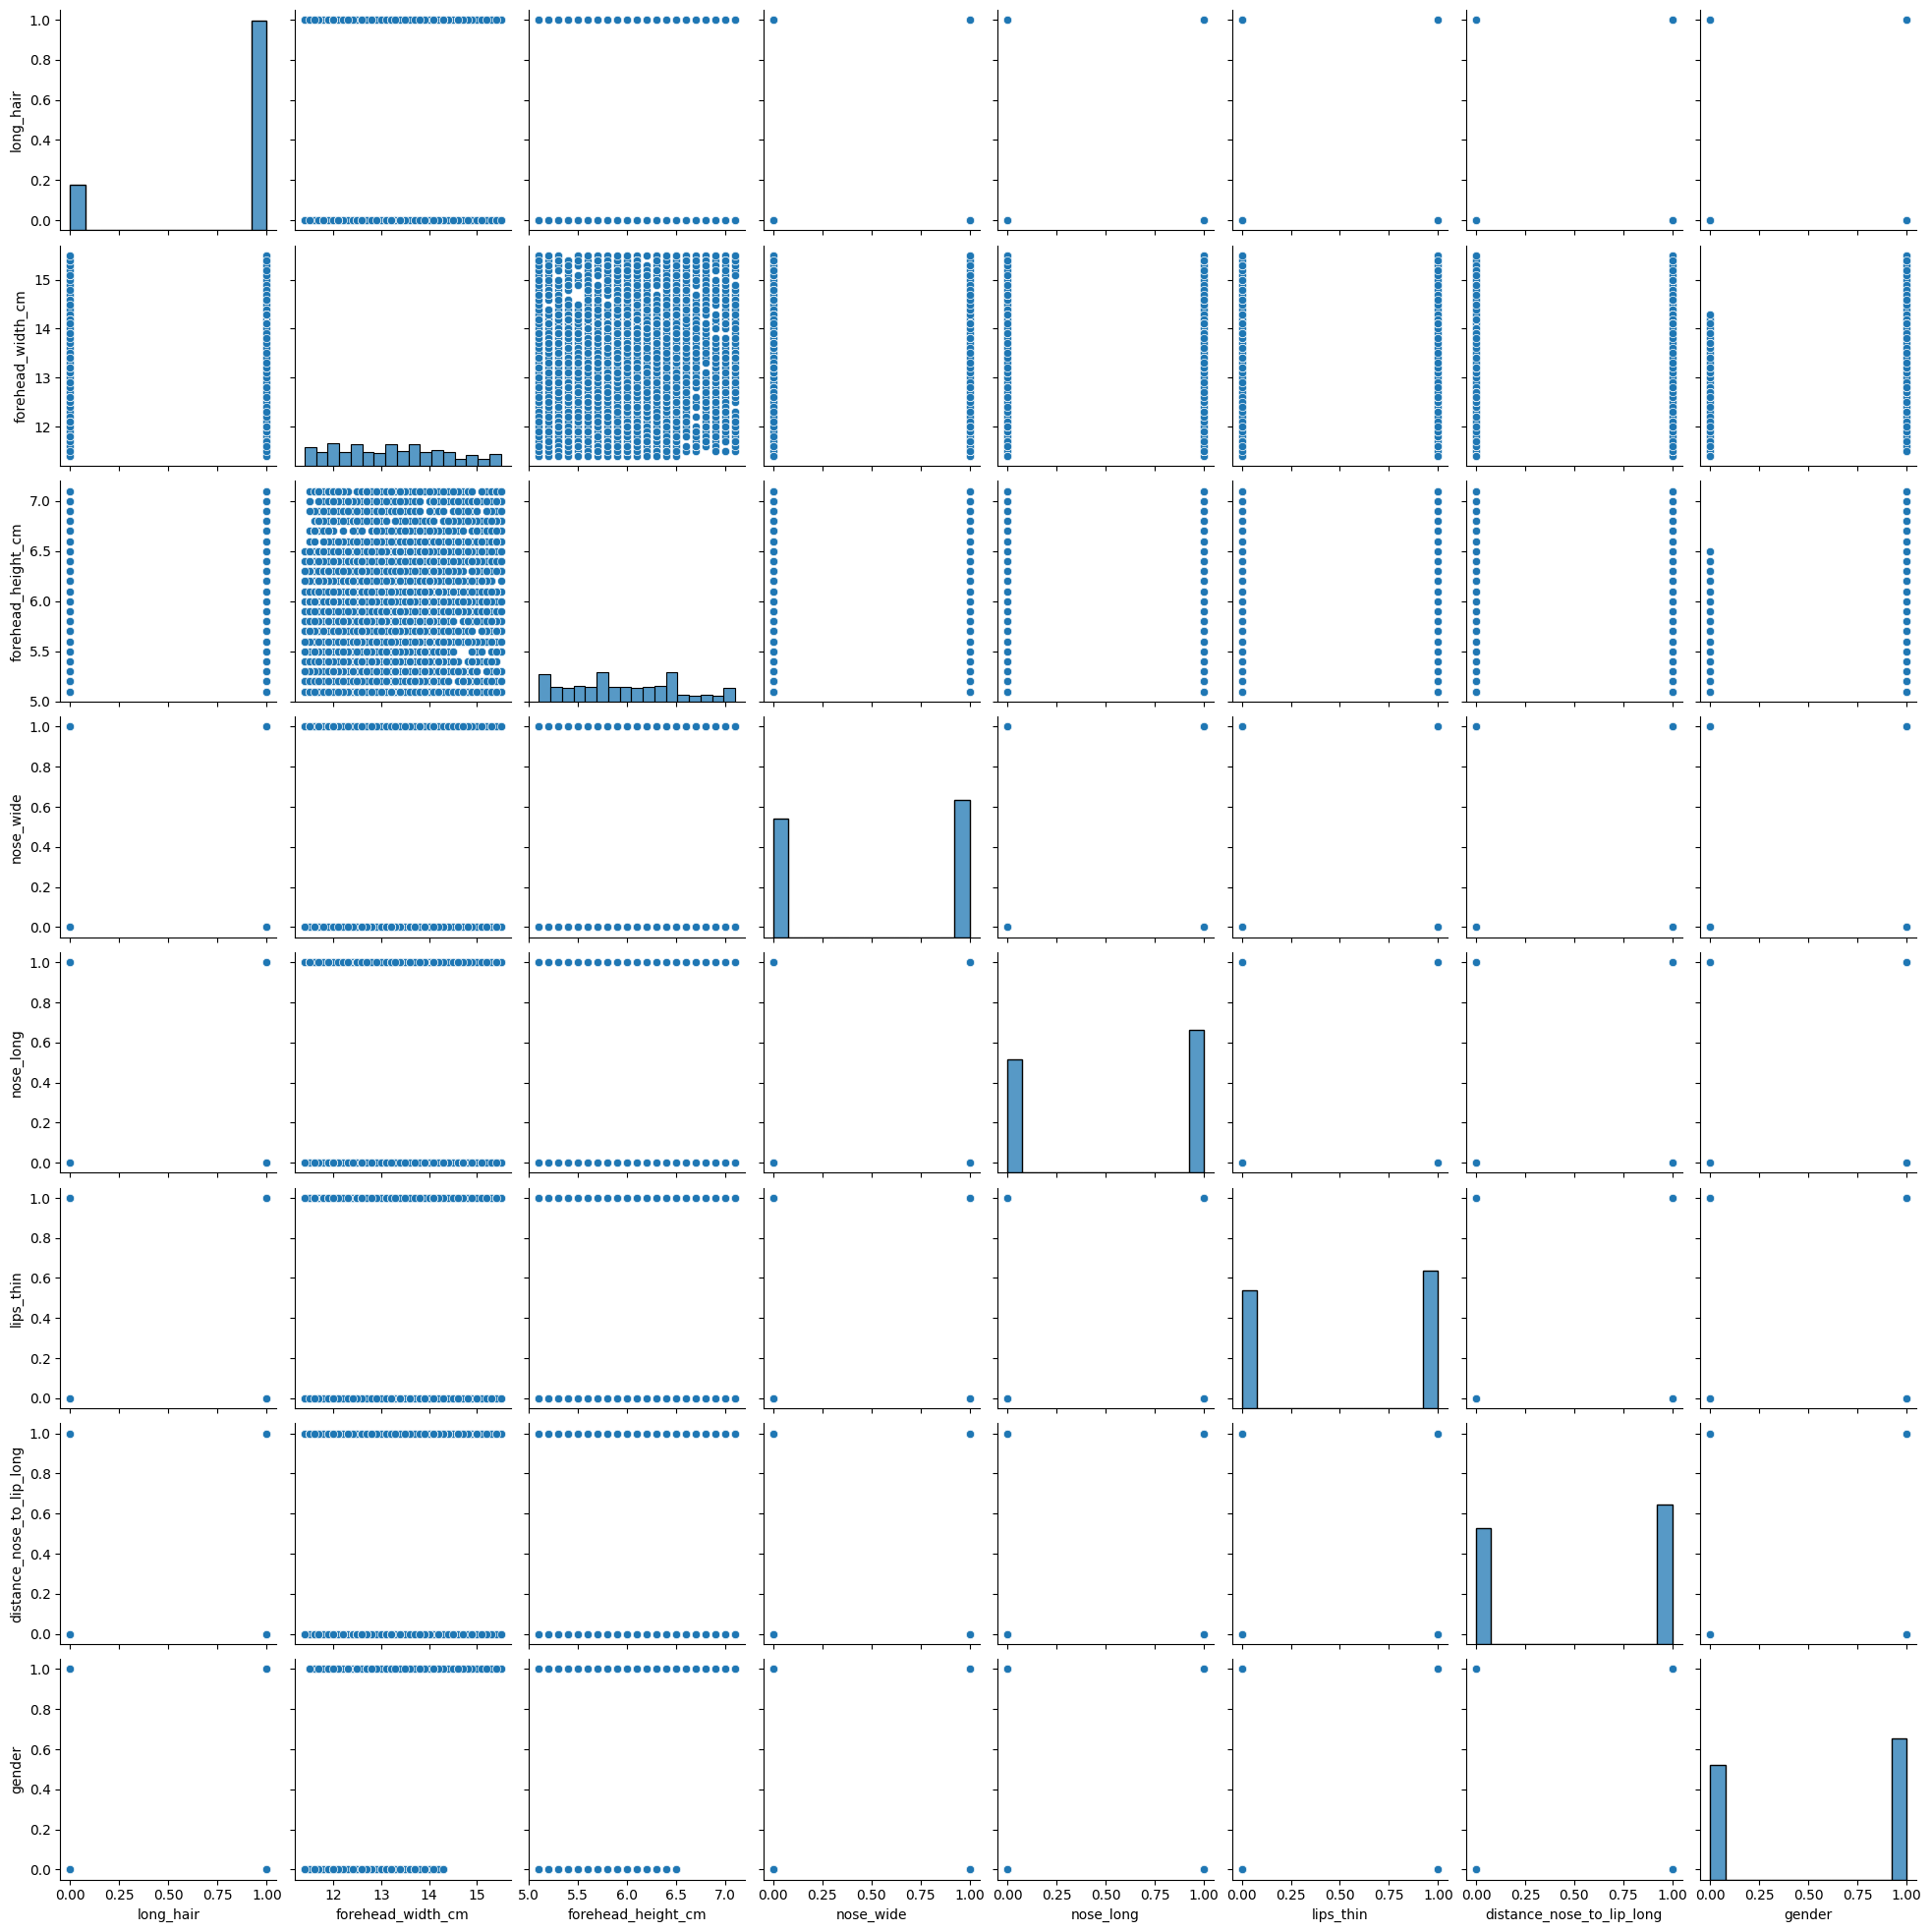

In [ ]:
sns.pairplot(df)
plt.show()

Next, let's check the correlations between the features:

In [ ]:
df_corr = df.corr()
df_corr

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.013151,-0.005145,0.024123,0.042556,0.037514,-0.011362,0.013933
forehead_width_cm,-0.013151,1.000000,0.079665,0.212223,0.212032,0.220566,0.206636,0.323520
forehead_height_cm,-0.005145,0.079665,1.000000,0.180526,0.153438,0.170018,0.183036,0.266843
nose_wide,0.024123,0.212223,0.180526,1.000000,0.394605,0.379767,0.395401,0.661864
nose_long,0.042556,0.212032,0.153438,0.394605,1.000000,0.384860,0.377462,0.638187
lips_thin,0.037514,0.220566,0.170018,0.379767,0.384860,1.000000,0.380805,0.631065
distance_nose_to_lip_long,-0.011362,0.206636,0.183036,0.395401,0.377462,0.380805,1.000000,0.646612
gender,0.013933,0.323520,0.266843,0.661864,0.638187,0.631065,0.646612,1.000000


There are both positive and negative correlations. Let's create a correlation matrix:

<Axes: title={'center': 'Correlation Matrix'}>

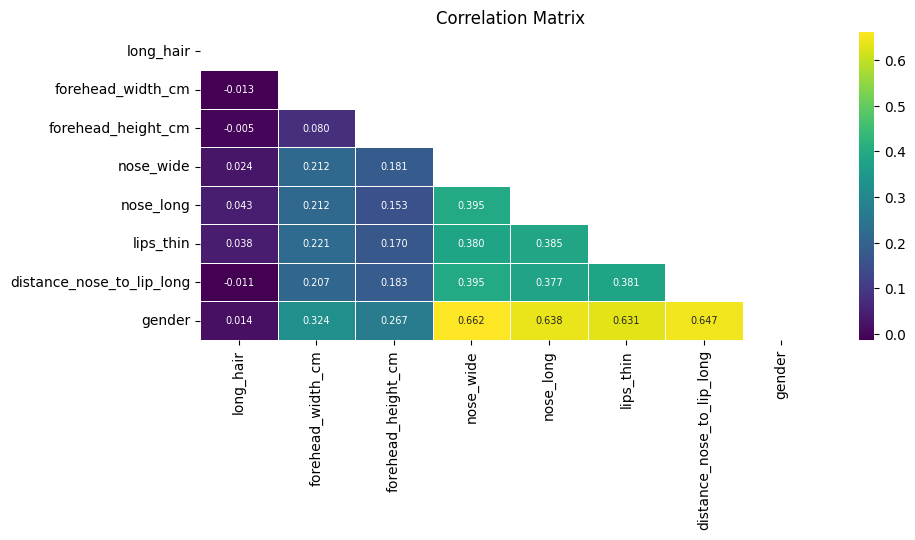

In [ ]:
mask = np.triu(df_corr)
plt.figure(figsize = (10, 4))
plt.title("Correlation Matrix")
sns.heatmap(df_corr,
            cmap = 'viridis',
            annot = True,
            annot_kws={"size": 7},
            mask = mask, linecolor = 'white',
            linewidth = .5,
            fmt = '.3f')

The feature we want to examine the correlations against is gender. The strongest positive correlation is with nose_wide. The positive correlations with nose_long, lips_thin and distance_nose_to_lip_long are almost as strong. There are very few negative correlations and they are very weak.

Most correlations are pretty strong, above 0.1, so we'll keep most of the features. The only exception is the correlation with long_hair. This feature is very weakly correlated with the other features as well. Looks like we can drop long_hair:

In [ ]:
df = df.drop('long_hair', axis=1)
df.head()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,11.8,6.1,1,0,1,1,1
1,14.0,5.4,0,0,1,0,0
2,11.8,6.3,1,1,1,1,1
3,14.4,6.1,0,1,1,1,1
4,13.5,5.9,0,0,0,0,0


### Quantitative Analysis of the Features

Let's create a set of histograms for all numeric features:

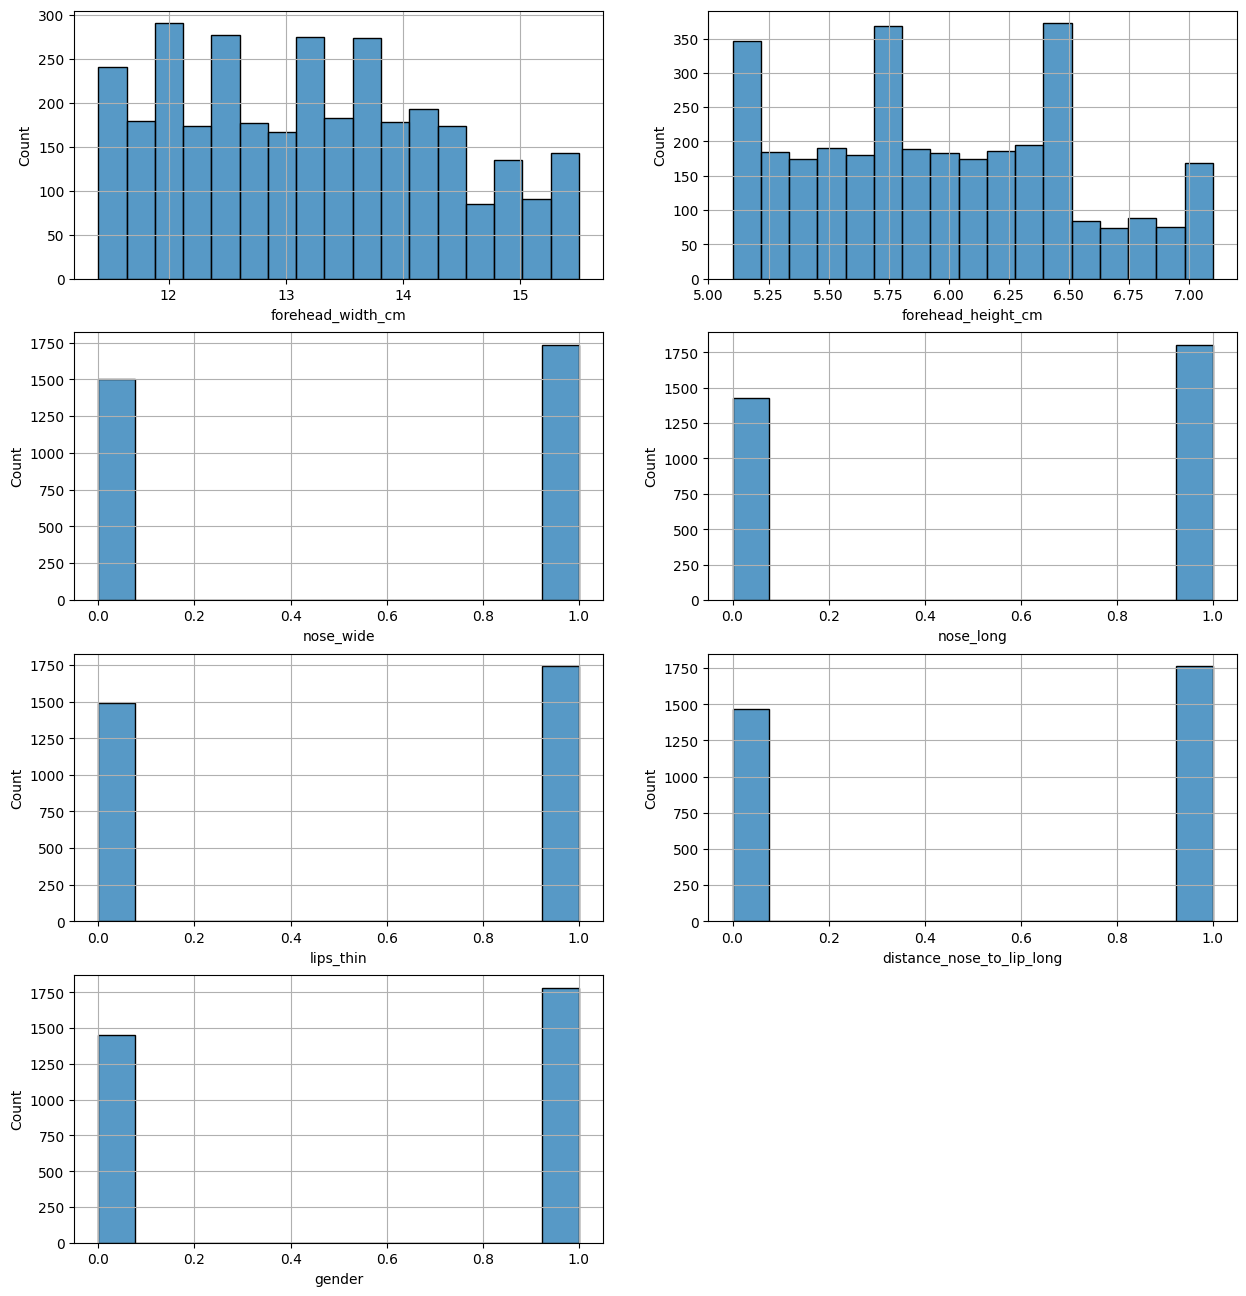

In [ ]:
plt.figure(figsize = (15, 16))

for i in range(len(df.columns)):
    plt.subplot(4, 2, i+1)
    sns.histplot(df.iloc[:, i]).set(ylabel='Count')
    plt.grid()

## Inputs and Outputs

The target feature, gender, is our output. The other features are our inputs:

In [ ]:
X = df.drop('gender', axis=1)
y = df['gender']

Let's check the input and output shapes:

In [ ]:
X.shape, y.shape

((3233, 6), (3233,))

So, there are 3233 records. This is what the first dimension tells us. The second dimension for X means it has 6 features (vector) whereas y has a single feature (scalar). We have 6 inputs for 1 output.

## Tensors

PyTorch works with tensors, so we have to turn our data into tensors:

In [ ]:
import torch

X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)

# Let's view some samples.
X[:5], y[:5]

(tensor([[11.8000,  6.1000,  1.0000,  0.0000,  1.0000,  1.0000],
         [14.0000,  5.4000,  0.0000,  0.0000,  1.0000,  0.0000],
         [11.8000,  6.3000,  1.0000,  1.0000,  1.0000,  1.0000],
         [14.4000,  6.1000,  0.0000,  1.0000,  1.0000,  1.0000],
         [13.5000,  5.9000,  0.0000,  0.0000,  0.0000,  0.0000]]),
 tensor([1., 0., 1., 1., 0.]))

## Training Set and Test Set

Before we build our model, we should split the data into two separate sets, a training set and a test set:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(2586, 647, 2586, 647)

We have 2586 training samples and 647 testing samples. Now we can start building the model.

# Model Building

We have the data in place, it's time to build a model. Besides the model, we'll define a loss function and optimizer.

But before that, let's make our code device agnostic. This is not strictly necessary for such a small dataset as ours, but it's good practice. This way, we'll make use of GPU if it's available, otherwise we'll make use of CPU:

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In Google Colab, we can change the runtime to GPU in the Runtime menu under Change runtime type. We're not going to do it here, though.

## Defining the Model

We now want to build a model that will take our inputs and produce outputs similar to our current outputs. In other words, given the features, the model will predict the labels.

There are a couple ways of approaching this in PyTorch, but we'll create the model as a class. If we create a model as a class, we almost always inherit from `nn.Module`. Then, inside the `__init__` method, we create the layers of the neural network. In our case, we will use both linear and nonlinear layers. We'll use the ReLU activation function for the latter.

It's up to us how many layers we create. It depends on how much space we want to give the model to learn. In any case, we pass two arguments to the `nn.Linear` method: `in_features`, set to the number of inputs in a particular layer, and `out_features`, set to the number of outputs from a particular layer. We can set these arguments to any numbers we want. We just have to follow the following rules:

- In the first layer, we set `in_features` to the number of inputs to the model.
- In the last layer, we set `out_features` to the number of outputs from the model.
- In the hidden layers (the layers between the first and last layers), the number if `in_features` must be equal to the number of `out_features` in the preceding layer.

We also have to define a `forward` method, which will contain the forward pass computation of the model.

In order to inherit from `nn.Module` and create the layers of the neural network, we have to import `nn`:

In [ ]:
from torch import nn

And now, let's build the model:

In [ ]:
class GenderClassificationModel(nn.Module):
    def __init__(self, input_features, out_features, hidden_units=12):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_features)
        )

    # Here we define the method that will compute the forward pass.
    def forward(self, x):
        return self.layer_stack(x)

Let's create an instance of the model and send it to the target device:

In [ ]:
model = GenderClassificationModel(input_features=6, out_features=1).to(device)
model

GenderClassificationModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=6, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=1, bias=True)
  )
)

## Loss Function and Optimizer

The loss function is used to measure how wrong your model's predictions are compared to the truth labels (the labels in the y_test set).

The optimizer instructs your model to update its internal parameters to lower the loss.

There are a lot of loss functions in PyTorch we can choose from. For binary classification, a common choice is BCE (Binary Cross Entropy), which we're going to use. To this end, we'll use the `torch.nn.BCEWithLogitsLoss` method. This method calculates loss using logits (the raw output from the model).

There are also a lot of optimizers. Some common ones are Adam and SGD (stochastic gradient descent). Let's pick SGD. In order to do that, we'll use the `torch.optim.SGD` method.

The SGD optimizer takes two parameters:

- `params` - these are the model's parameters that we want to optimize,
- `lr` - this is the learning rate - the higher it is the faster the optimizer will update the parameters.

We must be careful with the learning rate. It should be neither too high nor too low or it will fail to work.

So, here are the loss function and the optimizer:

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## Metrics

We'll evaluate our model using just one metric, accuracy. It's calculated as the total number of correct predictions divided by the total number of predictions. Let's define a function that will calculate accuracy for us:

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# Model Training

Training the model involves two loops: a training loop, where the model learns the relationships between the features and labels, and a testing loop, where the model is evaluated. Let's see what exactly each of the loops contains.

## Training Loop

As mentioned above, in the training loop, the model goes through the training data and learns how the features are related to the labels.

The steps inside a training loop contain:

1. Forward pass - the model performs the `forward` method on all training data,
2. Loss calculation - the model's predictions are compared to the test values to see how badly the model performs,
3. Gradient zeroing - the optimizer's gradients are set to zero (by default, they're accumulated) so that they can be calculated from scratch for this step,
4. Backpropagation - the gradient of the loss with respect to each parameter with `requires_grad` set to `True` is calculated,
5. Gradient descent - the parameters are updated.

## Testing Loop

The testing loop consists of the following steps:

1. Forward pass - the model performs the `forward` method on all testing data,
2. Loss calculation - the model's predictions are compared to the test values to see how badly the model performs,
3. (optionally) Evaluation metrics - we can calculate metrics like accuracy, precision or recall on the test set; we're not going to do it here.

## Training the Model

Now, let's implement all these steps in the training and testing loops:

In [ ]:
# seed for reprodicibility of random values
torch.manual_seed(42)

# Train for 1000 epochs.
epochs = 1000

# Put data on the available device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training loop

    # 1. Forward pass
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Loss and accuracy calculation
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Gradient zeroing
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Gradient descent
    optimizer.step()

    ### Testing loop

    # Put the model in evaluation mode.
    model.eval()

    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Loss and accuracy calculation
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        # Print out information every hundredth epoch
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.67739, Accuracy: 78.27% | Test loss: 0.66894, Test acc: 62.44%
Epoch: 100 | Loss: 0.53282, Accuracy: 78.81% | Test loss: 0.52815, Test acc: 79.44%
Epoch: 200 | Loss: 0.48476, Accuracy: 78.92% | Test loss: 0.49197, Test acc: 69.40%
Epoch: 300 | Loss: 0.39715, Accuracy: 85.89% | Test loss: 0.37675, Test acc: 72.18%
Epoch: 400 | Loss: 0.28316, Accuracy: 93.23% | Test loss: 0.28853, Test acc: 93.35%
Epoch: 500 | Loss: 0.23519, Accuracy: 93.23% | Test loss: 0.22902, Test acc: 94.44%
Epoch: 600 | Loss: 0.14979, Accuracy: 92.65% | Test loss: 0.13945, Test acc: 94.44%
Epoch: 700 | Loss: 0.13990, Accuracy: 92.61% | Test loss: 0.13126, Test acc: 92.89%
Epoch: 800 | Loss: 0.13903, Accuracy: 93.08% | Test loss: 0.13051, Test acc: 92.89%
Epoch: 900 | Loss: 0.13692, Accuracy: 93.12% | Test loss: 0.12837, Test acc: 92.74%


Looks like the loss is decreasing and accuracy is increasing, which is good.

# Model Evaluation

Let's evaluate the model and see how it performs on data it never saw:

In [ ]:
model.eval()

with torch.inference_mode():
    y_logits = model(X_test).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

Let's see how the test data and the predictions compare:

In [ ]:
y_preds[:10], y_test[:10]

(tensor([1., 1., 0., 1., 1., 0., 0., 1., 0., 0.]),
 tensor([1., 0., 0., 1., 1., 0., 0., 1., 0., 0.]))

In [ ]:
differences = (y_preds - y_test)

res = pd.DataFrame({'y_preds - y_test': differences}).value_counts()
res

,count
y_preds - y_test,
0.0,598
1.0,28
-1.0,21


As we can see, most of the test data is classified correctly. These are the cases where the difference between test data and prediction is 0.

# Conclusion

The model performs really well. It classifies most of the test data correctly. Naturally, there's always room for some improvement. One thing we could try is train it for more epochs. Feel free to give it a try.